# intro

The purpose of this file will be to try and create the M term for the Lind section and understand it.

We will take a gateway, a section, etc. Maybe a latitude or longitude. We can calculate the M across that section. I think this is dependent upon the velocity across the section

# load the packages and the grid to run

In [1]:
# import packages and functions
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc
import gsw
import sys

In [2]:
sys.path.append("/home/mmurakami/crios_backups/an_helper_functions")

from get_Jterms import *

(50,) (50, 1350, 270)
hf1 (1350, 270)
(1, 1350, 270)
LwetC2d 146614
LwetC 4833023



In [3]:
# let's do this exercise for the Barents Sea Lind mask
mymsk = np.load('/home/mmurakami/crios_backups/ASTE_270/Pemberton_BarentsSpaper/Lind2018/mask_Lind.npz')
mymsk = mymsk['msk1']

In [4]:
# let's do this exercise for the Barents Sea Lind mask
mymsk = np.load('/home/mmurakami/crios_backups/ASTE_270/Pemberton_BarentsSpaper/Lind2018/mask_Lind.npz')
mymsk = mymsk['msk1']

In [21]:
# also set the xlims and ylims for the given mask
xlims = np.array([420,530])
ylims = np.array([420,560])

# xlims = np.array([430,470])
# ylims = np.array([480,510])

In [30]:
hfC = mygrid['hFacC']
hfC0 = hfC[0]

# Create a copy to modify
hfC_modified = hfC.copy()
hfC0_copy = np.full((ny, nx), np.nan)
hfC0_copy[np.isnan(hfC0)] = 1

# Modify only the copied version
hfC_modified[0] = hfC0_copy

# # Plot the modified version
# plt.pcolormesh(get_aste_tracer(hfC_modified, nfx, nfy)[0])
# plt.colorbar()
# plt.show()

(420.0, 560.0)

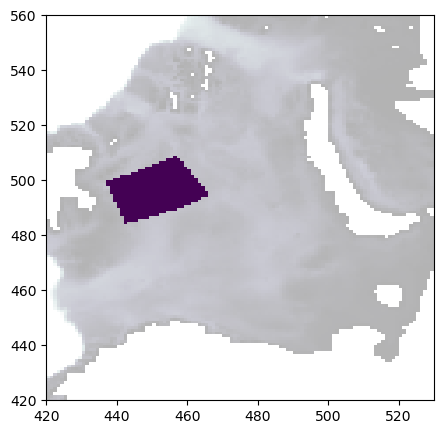

In [241]:
fig = plt.figure(figsize = (5,5))
plt.pcolormesh(get_aste_tracer(mygrid['Depth'],nfx,nfy)[0],cmap="bone",alpha=0.3,vmin=0,vmax=1000)
plt.pcolormesh(get_aste_tracer(hfC_modified,nfx,nfy)[0],cmap="bone_r")
plt.pcolormesh(get_aste_tracer(mymsk,nfx,nfy)[0])
plt.xlim(xlims)
plt.ylim(ylims)

In [242]:
# maybe we should make this a square just to be easier to calculate with U and V

In [347]:
# create the mask based on lat long
lon = mygrid['XC']
lat = mygrid['YC']
mask = np.zeros_like(lat)
mask[(lat >= 76.25) & (lat <= 78.5) & (lon >= 27) & (lon <= 41)] = 1  # Masked region
mask[mask == 0 ] = np.nan

In [348]:
# Using np.where to get indices where the mask equals 1
rows, cols = np.where(mask == 1)

# Get the extreme indices in each dimension
min_row, max_row = rows.min(), rows.max()
min_col, max_col = cols.min(), cols.max()

print("Bottom edge (min row index):", min_row)
print("Top edge (max row index):", max_row)
print("Left edge (min col index):", min_col)
print("Right edge (max col index):", max_col)

Bottom edge (min row index): 524
Top edge (max row index): 552
Left edge (min col index): 34
Right edge (max col index): 58


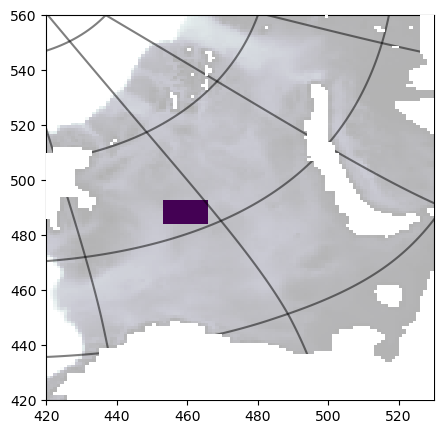

In [372]:
mask = np.zeros_like(lat)
max_row -=15
max_col -=15
mask[min_row:max_row,min_col:max_col] = 1
mask[mask == 0] = np.nan
msk_tobin = mask.copy()

fig = plt.figure(figsize=(5,5))

plt.pcolormesh(get_aste_tracer(mygrid['Depth'], nfx, nfy)[0],
               cmap="bone", alpha=0.3, vmin=0, vmax=1000)
plt.pcolormesh(get_aste_tracer(mask, nfx, nfy)[0])
# Draw the hfC_modified layer with a lower zorder
plt.pcolormesh(get_aste_tracer(hfC_modified, nfx, nfy)[0],
               cmap="bone_r", zorder=3)

# Now plot contours with a higher zorder
extent = [xlims[0], xlims[1], ylims[0], ylims[1]]
CS = plt.contour(get_aste_tracer(lat, nfx, nfy)[0],
                 levels=np.arange(70, 90, 5),
                 colors="black", zorder=1,alpha=0.5)
CS = plt.contour(get_aste_tracer(lon, nfx, nfy)[0],
                 levels=np.arange(0, 90, 20),
                 colors="black", zorder=1,alpha=0.5)
plt.clabel(CS, inline=True, fontsize=8)

plt.xlim(xlims)
plt.ylim(ylims)
plt.show()

(420.0, 560.0)

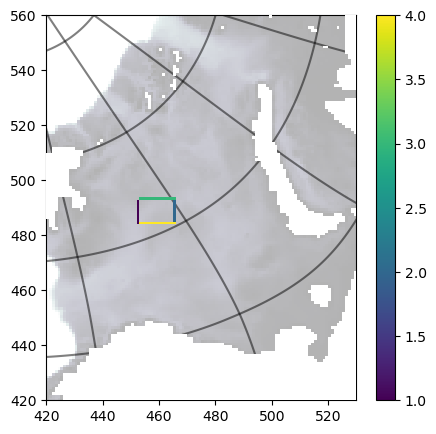

In [373]:
# get the four edges of this
topx = np.arange(min_col,max_col)
topy = np.full(topx.shape[0],max_row)
botx = np.arange(min_col,max_col)
boty = np.full(botx.shape[0],min_row)

righty = np.arange(min_row,max_row)
rightx = np.full(righty.shape[0],max_col)
lefty = np.arange(min_row,max_row)
leftx = np.full(lefty.shape[0],min_col)

# fill these in a new mask
mask = np.zeros_like(lat)
mask[topy,topx] = 1
mask[boty,botx] = 2
mask[righty,rightx] = 3
mask[lefty,leftx] = 4  # this is in fact the wrong terminology because this is flipped on face 3
mask[mask == 0] = np.nan

# plot this
fig = plt.figure(figsize = (5,5))
plt.pcolormesh(get_aste_tracer(mygrid['Depth'],nfx,nfy)[0],cmap="bone",alpha=0.3,vmin=0,vmax=1000)
plt.pcolormesh(get_aste_tracer(hfC_modified,nfx,nfy)[0],cmap="bone_r",zorder=5)
cb = plt.pcolormesh(get_aste_tracer(mask,nfx,nfy)[0],zorder=10)

CS = plt.contour(get_aste_tracer(lat, nfx, nfy)[0],
                 levels=np.arange(70, 90, 5),
                 colors="black", zorder=1,alpha=0.5)
CS = plt.contour(get_aste_tracer(lon, nfx, nfy)[0],
                 levels=np.arange(0, 90, 20),
                 colors="black", zorder=1,alpha=0.5)
plt.colorbar(cb)
plt.xlim(xlims)
plt.ylim(ylims)

# TO DO: OVERLAY THE U AND V ON ABOVE

# now get the binned T and S values, the U and V terms to calculate volume flow

In [374]:
# define the timesteps we want, we need theta, salt, binned_theta, binned_salt and U and V to get volume

In [375]:
# get the timesteps for the year 2007
# ocean and ice
AB_gT=0
AB_gS=0
dt_aste = 600
startyr = 2002
endyr = 2019

# all the filenames in the system
fnames = get_fnames(dt_aste,startyr,endyr)

times = {}
times["2007"] = np.arange(3,5,1)

# the filenames we want for 2014
tsstr,datetimes = get_tsteps(times,fnames,dt_aste,startyr,1,1)

t2 = int(tsstr[1])
dt = datetimes[1]-datetimes[0]   # days
dt = dt.total_seconds()

tsteps = len(datetimes)-1
tsteps

1

In [376]:
# load the bins
# we will use the bins from the An run so that we have the same thing in both sections
# Paths for the bins in this run
copypath = "/scratch/mmurakami/ASTE_270/LAYERS_copies/"
filename = "layers2TH"
boundsT = rdmds(copypath + filename)
binsTH_edges = boundsT.reshape(boundsT.shape[0])
binsTH_centers = (binsTH_edges[:-1] + binsTH_edges[1:])/2
nT = binsTH_edges.shape[0]-1
# boundsT

filename = "layers1SLT"
boundsS = rdmds(copypath + filename)
binsSLT_edges = boundsS.reshape(boundsS.shape[0])
binsSLT_centers = (binsSLT_edges[:-1] + binsSLT_edges[1:])/2
nS = binsSLT_edges.shape[0]-1
# boundsS

binwidthT = binsTH_edges[1:] - binsTH_edges[:-1]
binwidthS = binsSLT_edges[1:] - binsSLT_edges[:-1]

binwidthT1 = (binwidthT[:-1] + binwidthT[1:])/2
binwidthS1 = (binwidthS[:-1] + binwidthS[1:])/2

dT,dS = np.meshgrid(binwidthT,binwidthS)
dT = dT.reshape(112,112,1)
dS = dS.reshape(112,112,1)

binmidT = ((boundsT[:-1] + boundsT[1:])/2).reshape(nT)
binmidS = ((boundsS[:-1] + boundsS[1:])/2).reshape(nT)

binmidTp = boundsT[1:-1]
binmidSp = boundsS[1:-1]

Tbin,Sbin = np.meshgrid(binsTH_edges,binsSLT_edges)
Tbincent,Sbincent = np.meshgrid(binsTH_centers,binsSLT_centers)
nS,nT = 112,112

binmidTp = boundsT[1:-1]
binmidSp = boundsS[1:-1]
Tbin2,Sbin2 = np.meshgrid(binmidTp,binmidSp)

In [377]:
# add the isopycnals
# add the density contours from gsw
smin = 25.5 - (0.01 * 25.5)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 38 + (0.01 * 38)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -2 + (0.1 * -2)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = 31 + (0.1 * 31)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 50
ydim = 50
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-2,31,ydim)
si = np.linspace(25.5,38,xdim)
Freez_temp = gsw.CT_freezing(si,0,0)

Si, Ti = np.meshgrid(si, ti, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        #print(si[i],ti[j])
        dens[j,i]=gsw.rho(si[i],ti[j],0)
        # Substract 1000 to convert to sigma-0
dens2 = dens - 1000

tmin, tmax, smin, smax sizes=, -2.2 34.1 25.245 38.38


In [378]:
# read the averaged theta and salt files
file_name = "state_3d_set1"
meta_budg3d_kpptend_set1 = parsemeta(dirState + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_kpptend_set1["fldList"])
varnames = np.array(["THETA","SALT"])
recs = np.array([])
t2 = int(tsstr[1])  # read from the end of the averaged period
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
THETA,its,meta = rdmds(os.path.join(dirState, file_name),t2,returnmeta=True,rec=recs[0])
SALT,its,meta = rdmds(os.path.join(dirState, file_name),t2,returnmeta=True,rec=recs[1])

THETA = THETA.reshape(nz,ny,nx) * np.tile(msk_tobin[np.newaxis,:,:],(nz,1,1))
SALT = SALT.reshape(nz,ny,nx) * np.tile(msk_tobin[np.newaxis,:,:],(nz,1,1))

In [379]:
# bin the existing theta and salt
binned_theta = bin_array(THETA,binsTH_edges)
binned_theta = binned_theta.astype(float)
binned_theta[binned_theta == nT] = np.nan
binned_salinity = bin_array(SALT,binsSLT_edges)
binned_salinity = binned_salinity.astype(float)
binned_salinity[binned_salinity == nS] = np.nan

In [380]:
# create the volume and bin this
DXG3d = np.tile(mygrid['DXG'][np.newaxis,:,:],(nz,1,1))
DYG3d = np.tile(mygrid['DYG'][np.newaxis,:,:],(nz,1,1))
vol = DRF3d * DXG3d * DYG3d

In [381]:
# load the UVELMASS and VVELMASS
file_name = "budg3d_hflux_set2"
meta_budg3d_hflux_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_hflux_set2["fldList"])
varnames = np.array(["UVELMASS","VVELMASS"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
UVELMASS,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
VVELMASS,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])  # m/s

UVELMASS = UVELMASS.reshape(nz,ny,nx) * np.tile(msk_tobin[np.newaxis,:,:],(nz,1,1))
VVELMASS = VVELMASS.reshape(nz,ny,nx) * np.tile(msk_tobin[np.newaxis,:,:],(nz,1,1))

In [382]:
# get the vertical volume transport
Vtransport = VVELMASS * DXG3d # m^3/s
Utransport = UVELMASS * DYG3d # m^3/s

# plot just the pcolormesh of U or V transport in T-S space at the four gates

In [383]:
# select just the gate indices (we did this once in our analysis of Pemberton)

# create an array of all the distributions
distr = np.full((4,nT,nS),0)

# West/left gate (+ into box)
y_curr,x_curr = np.where(mask == 1)[0], np.where(mask == 1)[1]
gate_thetabins = binned_theta[:,y_curr-1,x_curr]
gate_saltbins = binned_salinity[:,y_curr-1,x_curr]
idx = 0
for i,j in zip(y_curr-1,x_curr):
    for z in range(nz):
        iT = int(gate_thetabins[z,idx])
        iS = int(gate_saltbins[z,idx])
        distr[0,iS,iT] += Utransport[z,i,j]
    idx += 1

# East/right gate (+ into box)
y_curr,x_curr = np.where(mask == 2)[0], np.where(mask == 2)[1]

gate_thetabins = binned_theta[:,y_curr,x_curr]
gate_saltbins = binned_salinity[:,y_curr,x_curr]

idx = 0
for i,j in zip(y_curr,x_curr):
    for z in range(nz):
        iT = int(gate_thetabins[z,idx])
        iS = int(gate_saltbins[z,idx])
        distr[1,iS,iT] -= Utransport[z,i,j]
    idx += 1

# North/top gate (+ into box)
y_curr,x_curr = np.where(mask == 3)[0], np.where(mask == 3)[1]
gate_thetabins = binned_theta[:,y_curr,x_curr-1]
gate_saltbins = binned_salinity[:,y_curr,x_curr-1]
idx = 0
for i,j in zip(y_curr,x_curr-1):
    for z in range(nz):
        iT = int(gate_thetabins[z,idx])
        iS = int(gate_saltbins[z,idx])
        distr[2,iS,iT] -= Vtransport[z,i,j]
    idx += 1


# South/bottom gate (+ into box)
y_curr,x_curr = np.where(mask == 4)[0], np.where(mask == 4)[1]
gate_thetabins = binned_theta[:,y_curr,x_curr]
gate_saltbins = binned_salinity[:,y_curr,x_curr]
idx = 0
for i,j in zip(y_curr,x_curr):
    for z in range(nz):
        iT = int(gate_thetabins[z,idx])
        iS = int(gate_saltbins[z,idx])
        distr[3,iS,iT] += Vtransport[z,i,j]
    idx += 1

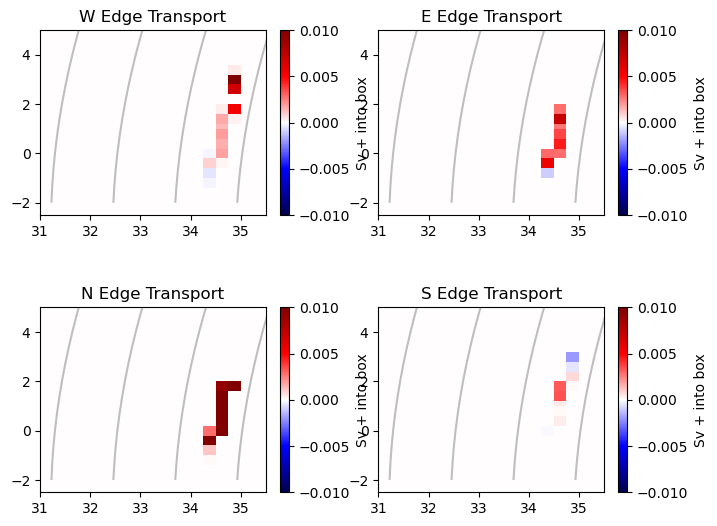

In [384]:
fig = plt.figure(figsize = (8,6))

# first subplot (gate = 1 = left edge)
ax = plt.subplot(221)
cb = ax.pcolormesh(Sbin,Tbin,distr[0]*1e-6,cmap='seismic',vmin=-.01,vmax =.01)
ax.set_ylim(-2.5,5)
ax.set_xlim(31,35.5)
plt.colorbar(cb, label="Sv + into box")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_title("W Edge Transport")

# second subplot (gate = 2 = right edge)
ax = plt.subplot(222)
cb = ax.pcolormesh(Sbin,Tbin,distr[1]*1e-6,cmap='seismic',vmin=-.01,vmax =.01)
ax.set_ylim(-2.5,5)
ax.set_xlim(31,35.5)
plt.colorbar(cb, label="Sv + into box")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_title("E Edge Transport")

# fourth subplot (gate = 3 = top edge)
ax = plt.subplot(223)
cb = ax.pcolormesh(Sbin,Tbin,distr[2]*1e-6,cmap='seismic',vmin=-.01,vmax =.01)
ax.set_ylim(-2.5,5)
ax.set_xlim(31,35.5)
plt.colorbar(cb, label="Sv + into box")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_title("N Edge Transport")

# third subplot (gate = 4 = bottom edge)
ax = plt.subplot(224)
cb = ax.pcolormesh(Sbin,Tbin,distr[3]*1e-6,cmap='seismic',vmin=-.01,vmax =.01)
ax.set_ylim(-2.5,5)
ax.set_xlim(31,35.5)
plt.colorbar(cb, label="Sv + into box")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_title("S Edge Transport")

plt.subplots_adjust(hspace = 0.5)

In [385]:
# plot these on two plots (one for T and one for S)
# create the lines
M_T = np.zeros((4,nT))  # create the array for each
for i in range(4):
    M_T[i] = np.nansum(distr[i]*1e-6,axis=0)

M_S = np.zeros((4,nS))  # create the array for each
for i in range(4):
    M_S[i] = np.nansum(distr[i]*1e-6,axis=1)

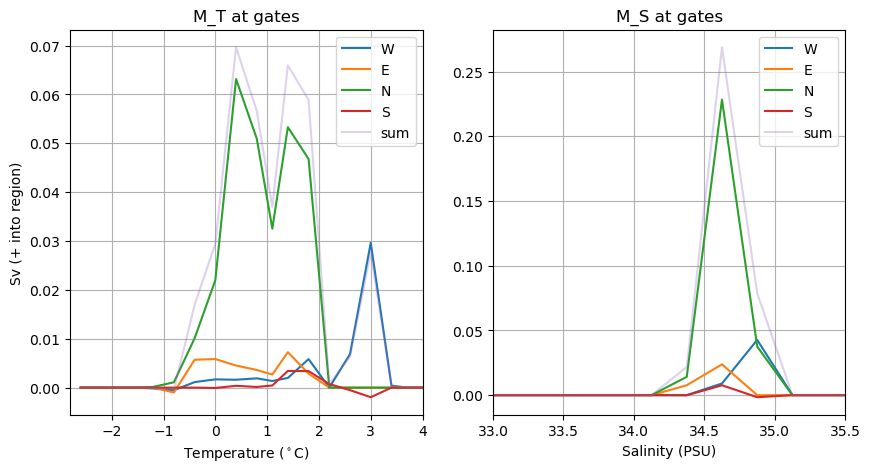

In [386]:
labels = np.array(["W","E","N","S"])

fig = plt.figure(figsize = (10,5))

ax = plt.subplot(121)
for i in range(4):
    ax.plot(binmidT,M_T[i],label=labels[i])
ax.plot(binmidT,np.nansum(M_T,axis=0),label="sum",alpha=0.3)
ax.set_xlim(-2.8,4)
ax.legend(loc="best")
ax.grid()
ax.set_title("M_T at gates")
ax.set_ylabel("Sv (+ into region)")
ax.set_xlabel(r"Temperature ($^\circ$C)")

ax = plt.subplot(122)
for i in range(4):
    ax.plot(binmidS,M_S[i],label=labels[i])

ax.plot(binmidS,np.nansum(M_S,axis=0),label="sum",alpha=0.3)
ax.set_xlim(33,35.5)
ax.legend(loc="best")
ax.grid()
ax.set_title("M_S at gates")
#ax.set_ylabel("Sv (+ into region)")
ax.set_xlabel(r"Salinity (PSU)")
ax.legend(loc="best")

plt.subplots_adjust(hspace = 0.5)

In [387]:
# J_terms_nn have the Sv that we need at each value, can we not plot these as well?

# I think we want to plot G_T and G_S as well as the surface term, which will be volume added to any one set of T-S bins

# set a larger array for one year of the terms

vol_mesh_all = np.zeros((tsteps,nS,nT))
JtermsT_all = np.zeros((tsteps,5,nS,nT))  # recall this is in the format tend, adv, df, kpp, and surface
JtermsS_all = np.zeros((tsteps,5,nS,nT))
JtermsT_nn_all = np.zeros((tsteps,5,nS,nT))
JtermsS_nn_all = np.zeros((tsteps,5,nS,nT))

In [388]:
iB = 6
for i in range(len(datetimes)-1):
    print(datetimes[i])
    tsstrhere = tsstr[i:i+2]
    datetimeshere = datetimes[i:i+2]
    dt = datetimes[i+1]-datetimes[i]
    dt = dt.total_seconds()
    t2 = int(tsstr[i+1])

    # run the function - check if this works
    vol_mesh,JtermsT,JtermsS,JtermsT_nn,JtermsS_nn = get_Jterms(fnames,tsstrhere,datetimeshere,dt,t2,msk_tobin,iB,RAC,RAC3,myparms)

    vol_mesh_all[i] = vol_mesh
    JtermsT_all[i] = JtermsT
    JtermsS_all[i] = JtermsS
    JtermsT_nn_all[i] = JtermsT_nn
    JtermsS_nn_all[i] = JtermsS_nn

2007-03-01 00:00:00
doing salt budget
doing heat budget
2
doing volume
doing TS binning
creating the J terms now
doing JtermsT
total residual -6.384577247312354e-14 Sv/PSU
doing JtermsS
total residual -1.4266490047584064e-12 Sv/degC
doing not normalized J terms
total residual -6.384577247312354e-14 Sv
total residual -1.4266490047584064e-12 Sv


# we can plot the total G_T and G_S but this is without the surface term

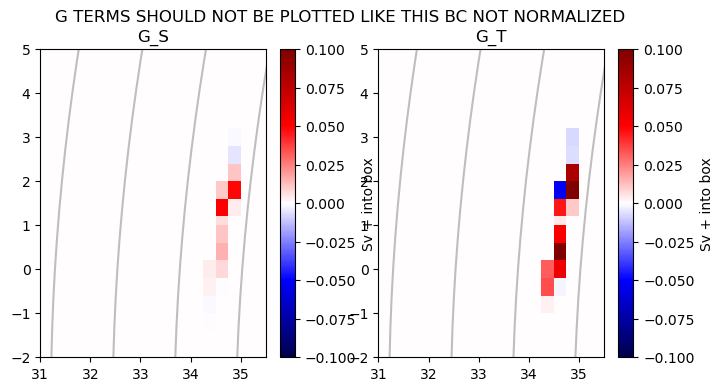

In [389]:
# I think it does not make sense to plot these in T-S but rather in T or S individually

fig = plt.figure(figsize = (8,4))

# first subplot (gate = 1 = left edge)
ax = plt.subplot(121)
cb = ax.pcolormesh(Sbin,Tbin,JtermsS_nn_all[0][0],cmap='seismic',vmin=-.1,vmax =.1)
ax.set_ylim(-2,5)
ax.set_xlim(31,35.5)
plt.colorbar(cb, label="Sv + into box")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_title("G_S")

# second subplot (gate = 2 = right edge)
ax = plt.subplot(122)
cb = ax.pcolormesh(Sbin,Tbin,JtermsT_nn_all[0][0],cmap='seismic',vmin=-.1,vmax =.1)
ax.set_ylim(-2,5)
ax.set_xlim(31,35.5)
plt.colorbar(cb, label="Sv + into box")
cs = ax.contour(si, ti, dens2, colors="grey", zorder=1, alpha=0.5, levels=np.arange(16, 32, 1))
ax.clabel(cs, fontsize=10, inline=False, fmt="%.f")
ax.set_title("G_T")

plt.suptitle("G TERMS SHOULD NOT BE PLOTTED LIKE THIS BC NOT NORMALIZED")

plt.subplots_adjust(hspace = 0.5)

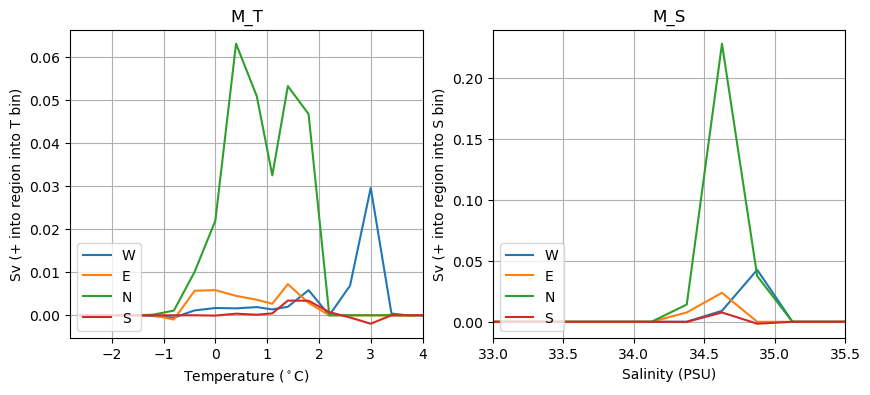

In [390]:
# plot these in comparison to the M_T and M_S terms

fig = plt.figure(figsize = (10,4))

labels = np.array(["W","E","N","S"])

# M_T at the gates
ax = plt.subplot(121)
for i in range(4):
    ax.plot(binmidT,M_T[i],label=labels[i])
# data = np.nansum(JtermsT_nn_all[0][0],axis=0)
# ax.plot(binmidT,data,label="G_T",alpha=1)
ax.set_xlim(-2.8,4)
ax.legend(loc="lower left")
ax.grid()
ax.set_title("M_T")
ax.set_ylabel("Sv (+ into region into T bin)")
ax.set_xlabel(r"Temperature ($^\circ$C)")

# M_S at the gates
ax = plt.subplot(122)
for i in range(4):
    ax.plot(binmidS,M_S[i],label=labels[i])
# data = np.nansum(JtermsS_nn_all[0][0],axis=1)
# ax.plot(binmidS,data,label="G_S",alpha=1)
ax.set_xlim(33,35.5)
ax.legend(loc="best")
ax.grid()
ax.set_title("M_S")
ax.set_ylabel("Sv (+ into region into S bin)")
ax.set_xlabel(r"Salinity (PSU)")
ax.legend(loc="lower left")


plt.subplots_adjust(hspace = 0.5)

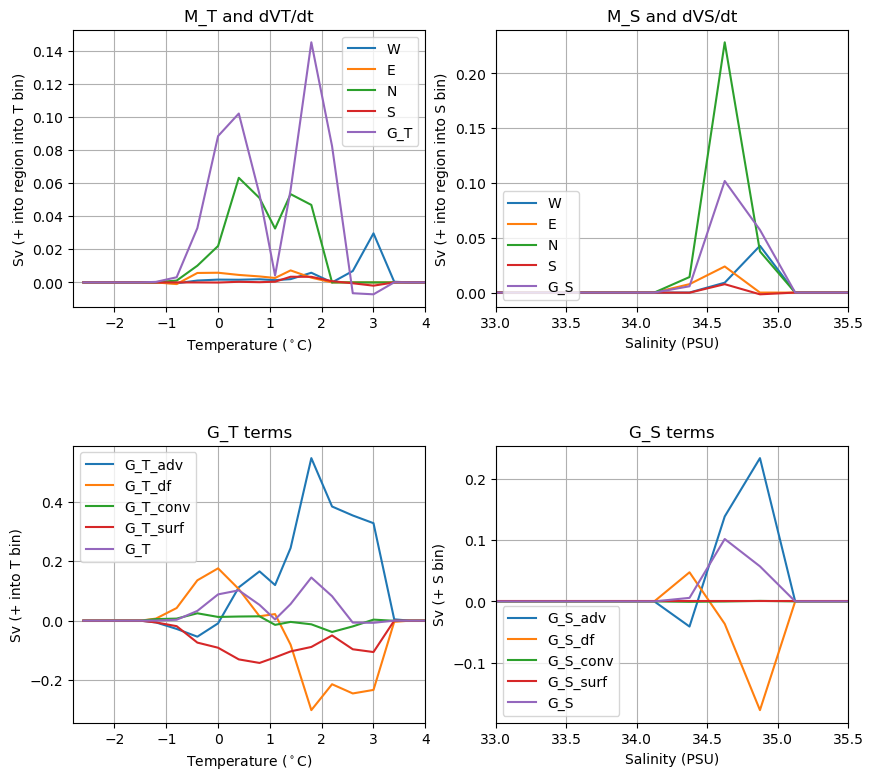

In [392]:
# let's plot all the G terms on one to see, maybe I'm not understanding this

fig = plt.figure(figsize = (10,9))


labels = np.array(["W","E","N","S"])

# M_T at the gates
ax = plt.subplot(221)
for i in range(4):
    ax.plot(binmidT,M_T[i],label=labels[i])
data = np.nansum(JtermsT_nn_all[0][0],axis=0)
ax.plot(binmidT,data,label="G_T",alpha=1)
ax.set_xlim(-2.8,4)
ax.legend(loc="upper right")
ax.grid()
ax.set_title("M_T and dVT/dt")
ax.set_ylabel("Sv (+ into region into T bin)")
ax.set_xlabel(r"Temperature ($^\circ$C)")

# M_S at the gates
ax = plt.subplot(222)
for i in range(4):
    ax.plot(binmidS,M_S[i],label=labels[i])
data = np.nansum(JtermsS_nn_all[0][0],axis=1)
ax.plot(binmidS,data,label="G_S",alpha=1)
ax.set_xlim(33,35.5)
ax.legend(loc="upper left")
ax.grid()
ax.set_title("M_S and dVS/dt")
ax.set_ylabel("Sv (+ into region into S bin)")
ax.set_xlabel(r"Salinity (PSU)")
ax.legend(loc="lower left")


# M_T at the gates
ax = plt.subplot(223)
ax.plot(binmidT,np.nansum(JtermsT_nn_all[0][1],axis=0),label="G_T_adv",alpha=1)
ax.plot(binmidT,np.nansum(JtermsT_nn_all[0][2],axis=0),label="G_T_df",alpha=1)
ax.plot(binmidT,np.nansum(JtermsT_nn_all[0][3],axis=0),label="G_T_conv",alpha=1)
ax.plot(binmidT,np.nansum(JtermsT_nn_all[0][4],axis=0),label="G_T_surf",alpha=1)
ax.plot(binmidT,np.nansum(JtermsT_nn_all[0][0],axis=0),label="G_T",alpha=1)

ax.set_xlim(-2.8,4)
ax.legend(loc="upper left")
ax.grid()
ax.set_title("G_T terms")
ax.set_ylabel("Sv (+ into T bin)")
ax.set_xlabel(r"Temperature ($^\circ$C)")

# M_S at the gates
ax = plt.subplot(224)
ax.plot(binmidS,np.nansum(JtermsS_nn_all[0][1],axis=1),label="G_S_adv",alpha=1)
ax.plot(binmidS,np.nansum(JtermsS_nn_all[0][2],axis=1),label="G_S_df",alpha=1)
ax.plot(binmidS,np.nansum(JtermsS_nn_all[0][3],axis=1),label="G_S_conv",alpha=1)
ax.plot(binmidS,np.nansum(JtermsS_nn_all[0][4],axis=1),label="G_S_surf",alpha=1)
ax.plot(binmidS,np.nansum(JtermsS_nn_all[0][0],axis=1),label="G_S",alpha=1)

ax.set_xlim(33,35.5)
ax.legend(loc="upper left")
ax.grid()
ax.set_title("G_S terms")
ax.set_ylabel("Sv (+ S bin)")
ax.set_xlabel(r"Salinity (PSU)")
ax.legend(loc="lower left")

plt.subplots_adjust(hspace = 0.5)

# do dV/dt by hand

In [287]:
# try to read this with rec
fldlist = np.array(meta_budg2d_snap_set1['fldList'])
varnames = np.array(['ETAN'])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])

ETAN = np.full((len(tsstr),ny,nx),np.nan)

for i in range(len(tsstr)):
    thisETAN,its,meta = rdmds(os.path.join(dirIn, file_name),int(tsstr[i]),returnmeta=True,rec=recs[0])
    thisETAN = thisETAN.reshape(ny,nx)
    ETAN[i] = thisETAN

dETANdt =  (ETAN[1, :, :] - ETAN[0, :, :]) / dt   #m/s

In [291]:
tmp1 = DRF3d * hfC   # m
tmp2 = tmp1/(np.tile(DD[np.newaxis,:,:],(nz,1,1)))  # m/m
tmptend = tmp2 * np.tile(dETANdt[np.newaxis,:,:],(nz,1,1)) * RAC3   # m/s * m^2 = m^3/s

In [292]:
tmptend = tmptend * msk_tobin

In [301]:
# 1. Identify valid points (where tmptend is not NaN).
valid = ~np.isnan(tmptend)

# 2. Extract the integer bin indices and the values you want to sum
iT = binned_theta[valid].astype(int)    # Temperature-bin indices
iS = binned_salinity[valid].astype(int) # Salinity-bin indices
vals = tmptend[valid]                   # Values to be added

# 3. Initialize the output array
dETAN_mesh = np.zeros((nS, nT), dtype=tmptend.dtype)

# 4. Accumulate all values in one shot
np.add.at(dETAN_mesh, (iS, iT), vals)

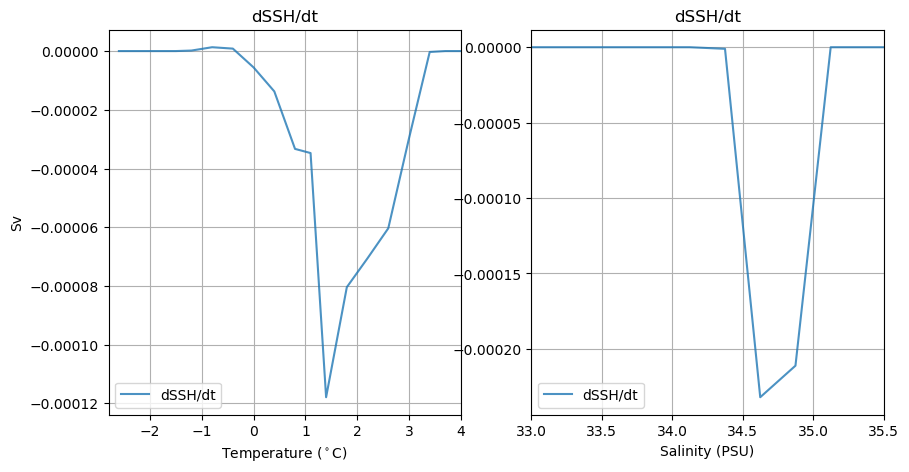

In [311]:
fig = plt.figure(figsize = (10,5))

ax = plt.subplot(121)
ax.plot(binmidT,np.nansum(dETAN_mesh * 1e-6,axis=0),label="dSSH/dt",alpha=0.8)
ax.set_xlim(-2.8,4)
ax.legend(loc="best")
ax.grid()
ax.set_title("dSSH/dt")
ax.set_xlabel(r"Temperature ($^\circ$C)")
ax.set_ylabel("Sv")

ax = plt.subplot(122)
ax.plot(binmidS,np.nansum(dETAN_mesh * 1e-6,axis=1),label="dSSH/dt",alpha=0.8)
ax.set_xlim(33,35.5)
ax.legend(loc="best")
ax.grid()
ax.set_title("dSSH/dt")
ax.set_xlabel(r"Salinity (PSU)")
ax.legend(loc="best")

plt.subplots_adjust(hspace = 0.5)

# do E term by hand (not sure if this is SFLUX)